# Tensorflow basics

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Fix OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [8]:
# Prepare data
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(low=-10,high=10,size=(observations,1))

inputs = np.column_stack((xs, zs))

noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

np.savez('./data/TF_basics', inputs=inputs, targets=targets) # save tensors as np arrays in npz file

In [9]:
# Train with TensorFlow
training_data = np.load('./data/TF_basics.npz')
input_size = 2
output_size = 1
model = tf.keras.Sequential([
    # computes dot product of the inputs and weights and add bias
    tf.keras.layers.Dense(output_size,
                            # Optional: we can set initial values for weights and bias
                            kernel_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                            bias_initializer=tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                         ),
])
model.compile(
    # Stochastic Gradient Descent as optimizer
    # Optional: we can customize it => tf.keras.optimizers.SGD(learning_rate=0.2)
    optimizer='SGD',
    # MSE as loss function (similar to L2 norm scaled by #observations)
    loss='mean_squared_error'
)
model.fit(training_data['inputs'],training_data['targets'], epochs=100, verbose=1) # epoch = iteration over full dataset

Epoch 1/100
32/32 [==============================] - 0s 516us/step - loss: 30.5945
Epoch 2/100
32/32 [==============================] - 0s 451us/step - loss: 4.6355
Epoch 3/100
32/32 [==============================] - 0s 428us/step - loss: 1.4998
Epoch 4/100
32/32 [==============================] - 0s 404us/step - loss: 0.6708
Epoch 5/100
32/32 [==============================] - 0s 387us/step - loss: 0.4303
Epoch 6/100
32/32 [==============================] - 0s 437us/step - loss: 0.3706
Epoch 7/100
32/32 [==============================] - 0s 438us/step - loss: 0.3588
Epoch 8/100
32/32 [==============================] - 0s 405us/step - loss: 0.3550
Epoch 9/100
32/32 [==============================] - 0s 467us/step - loss: 0.3498
Epoch 10/100
32/32 [==============================] - 0s 461us/step - loss: 0.3466
Epoch 11/100
32/32 [==============================] - 0s 475us/step - loss: 0.3510
Epoch 12/100
32/32 [==============================] - 0s 422us/step - loss: 0.3510
Epoch 13/100

32/32 [==============================] - 0s 419us/step - loss: 0.3489
Epoch 100/100
32/32 [==============================] - 0s 440us/step - loss: 0.3498


In [10]:
# Extract weights and bias
weights = model.layers[0].get_weights()[0] # our model has only 1 layer
bias = model.layers[0].get_weights()[1]
weights, bias

(array([[ 2.0193717],
        [-2.9692602]], dtype=float32),
 array([4.9631953], dtype=float32))

In [11]:
# Make predictions
predictions = model.predict_on_batch(training_data['inputs'])

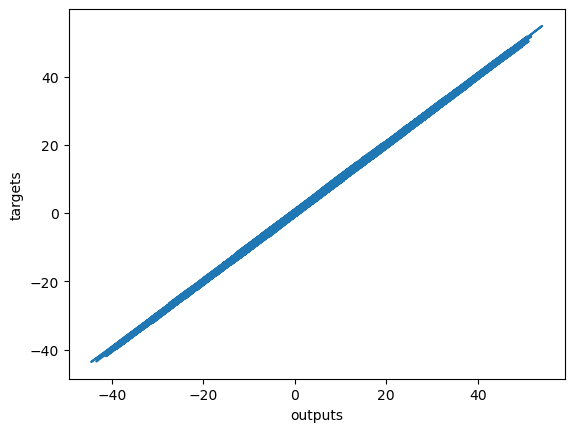

In [12]:
# Plot model accuracy
plt.plot(np.squeeze(predictions), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()